In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv("titanic.csv")

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
df.drop(columns=["Cabin"],inplace=True)

In [81]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Embarked"].fillna('unknown',inplace=True)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [83]:
df.drop(columns=["Ticket","Name"],inplace=True)

In [84]:
df=pd.get_dummies(df,drop_first=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    float64
 7   Sex_male          891 non-null    bool   
 8   Embarked_Q        891 non-null    bool   
 9   Embarked_S        891 non-null    bool   
 10  Embarked_unknown  891 non-null    bool   
dtypes: bool(4), float64(2), int64(5)
memory usage: 52.3 KB


In [86]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

<Axes: >

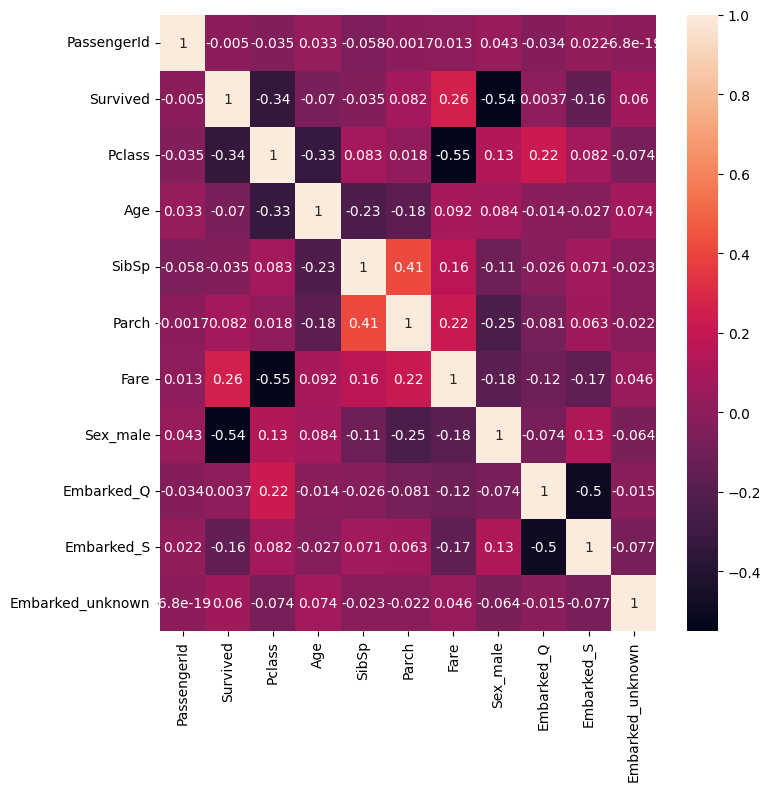

In [87]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
model=StandardScaler()
x_scalar=model.fit_transform(x)
x=pd.DataFrame(x_scalar,columns=x.columns)

In [90]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_unknown
0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306,-0.047431
1,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710,-0.047431
2,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306,-0.047431
3,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306,-0.047431
4,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306,-0.047431


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=100)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression()

In [95]:
y_pred=logistic_regression.predict(x_test)

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [97]:
accuracy_score(y_pred,y_test)

0.7994389901823282

<Axes: >

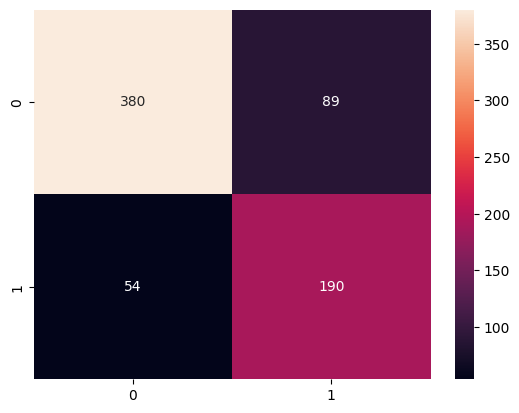

In [98]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='d')

In [99]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       469
           1       0.68      0.78      0.73       244

    accuracy                           0.80       713
   macro avg       0.78      0.79      0.78       713
weighted avg       0.81      0.80      0.80       713

